### More Important Functions

In [357]:
# value_counts
# sort_values
# rank
# sort index
# set index
# rename index -> rename
# reset index
# unique & nunique
# isnull/notnull/hasnans
# dropna
# fillna
# drop_duplicates
# drop
# apply
# isin
# corr
# nlargest -> nsmallest
# insert
# copy

The `value_counts()` function groups the elements of a Series or DataFrame by a given column, counts them, and returns a Series with counts. Syntax:

```python
value_counts = series_name.value_counts() or df['column_name'].value_counts()
```

The `sort_values()` method sorts the values in a Series or DataFrame based on their categories. Syntax:

```python
sorted_series = series_name.sort_values() or df[['column1', 'column2']].sort_values(by='column2')
```

`rank()` assigns a rank to each unique value of a Series, assigning the smallest possible integer rank to the first occurrence and incrementing it for subsequent occurrences. Syntax:

```python
ranks = series_name.rank()
```

The `sort_index()` method sorts the index labels of a DataFrame. Syntax:

```python
sorted_df = df.sort_index()
```

`set_index()` is used to reindex data by specifying a new Index, removing unwanted columns, or selecting a subset of rows and/or columns from an existing DataFrame. Syntax:

```python
df.set_index(column_name)
```

The `rename()` method changes the names of one or more labels in the index of the DataFrame. Syntax:

```python
df.rename(columns={'old_name': 'new_name'})
```

`reset_index()` resets the index of a DataFrame to be a multi-level index. Syntax:

```python
df.reset_index()
```

The `unique()`, `nunique()`, and `isin()` methods are used to return unique values, counts of unique elements, or boolean indexing based on values in a Series or DataFrame respectively. Syntax:

```python
unique_values = series_name.unique()
count_unique = df['column'].nunique() or series_name.isin([value1, value2])
```

`corr()` computes the correlation coefficients between columns in a DataFrame. Syntax:

```python
correlation_matrix = df.corr()
```

`nlargest(n)` returns the `n` largest values of a Series and their indices. The syntax is:

```python
largest_values = series_name.nlargest(3) # specify number of rows you want to return
```

The `fillna()` method fills NaN (not-a-number) values with a specified fill value, either an integer or string value. Syntax:

```python
df.fillna(value='default_value')
```

`drop_duplicates()` removes duplicate rows from the DataFrame. Syntax:

```python
filtered_df = df.drop_duplicates(subset=['column1', 'column2'])
```

The `drop()` function is used to remove columns, or a group of columns using a list or dictionary. Syntax:

```python
df.drop(columns=['column1', 'column2']) # removes specified column(s)
```

`apply()` applies functions along one axis (rows for rows_axis, columns for columns_axis) and returns a Series/Array, respectively. Syntax:

```python
series_name.apply(func, axis=0, raw=True, result_type='reduce')
```
or

```python
df.apply(func, axis=1, raw=False, result_type='expand') # for column-wise operations
```


In [358]:
import pandas as pd
import numpy as np

In [359]:
# value_counts
a = pd.Series([1,1,2,2,3,3,3])
a.value_counts()

3    3
1    2
2    2
Name: count, dtype: int64

In [360]:
# value_counts(series and dataframe)
marks = pd.DataFrame([
 [100,80,10],
 [90,70,7],
 [120,100,14],
 [80,70,14],
 [80,70,14]
],columns=['iq','marks','package'])
marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [361]:
marks.value_counts()

iq   marks  package
80   70     14         2
90   70     7          1
100  80     10         1
120  100    14         1
Name: count, dtype: int64

In [362]:
ipl = pd.read_csv('../datasets/ipl-matches.csv')
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts().sort_values(ascending=False).head(1)

Player_of_Match
F du Plessis    3
Name: count, dtype: int64

In [363]:
# find which player has won most potm -> in finals and qualifiers
ipl[(ipl['MatchNumber'] == 'Final') | (ipl['MatchNumber']=='qualifiers')]['Player_of_Match'].value_counts().sort_values(ascending=False).head(1)

Player_of_Match
HH Pandya    1
Name: count, dtype: int64

<Axes: xlabel='TossDecision'>

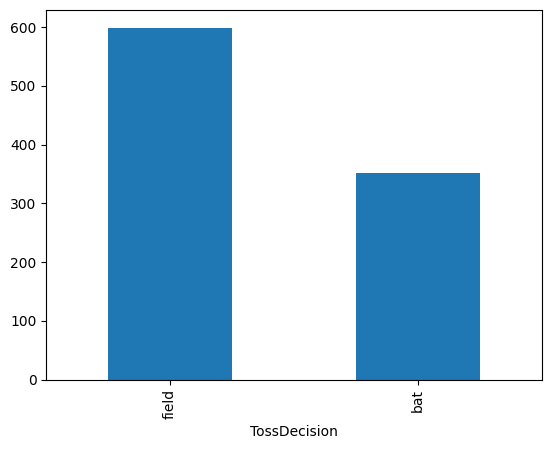

In [364]:
# Toss decision plot
ipl['TossDecision'].value_counts().plot(kind='bar')

In [365]:
# how many matches each team has played
(ipl['Team1'].value_counts()+ipl['Team2'].value_counts()).sort_values(ascending=False)

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

In [366]:
movies = pd.read_csv('../datasets/movies.csv')
movies.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [367]:
movies['title_x'].sort_values(ascending=False)

1623                    Zubeidaa
939        Zor Lagaa Ke...Haiya!
756                     Zokkomon
670            Zindagi Tere Naam
778     Zindagi Na Milegi Dobara
                  ...           
1039            1971 (2007 film)
723       1920: The Evil Returns
287                 1920: London
1021                 1920 (film)
1498          16 December (film)
Name: title_x, Length: 1629, dtype: object

In [368]:
# Define sample data
names = ["Student_" + str(i) for i in range(1, 51)]
colleges = np.random.choice(["College A", "College B", "College C", np.nan], 50)
branches = np.random.choice(["CSE", "ECE", "ME", "Civil", np.nan], 50)
cgpas = np.random.choice([np.round(np.random.uniform(6, 10), 2), np.nan], 50)
packages = np.random.choice([np.round(np.random.uniform(3, 20), 2), np.nan], 50)

students = pd.DataFrame({
    "name": names,
    "college": colleges,
    "branch": branches,
    "cgpa": cgpas,
    "package": packages
})

print(students)

          name    college branch  cgpa  package
0    Student_1  College C     ME  9.64      NaN
1    Student_2  College B    ECE  9.64      NaN
2    Student_3  College A  Civil  9.64      NaN
3    Student_4        nan     ME  9.64    17.79
4    Student_5        nan    nan  9.64    17.79
5    Student_6  College A    CSE  9.64      NaN
6    Student_7  College A    nan   NaN      NaN
7    Student_8  College A  Civil   NaN    17.79
8    Student_9  College C     ME   NaN      NaN
9   Student_10  College B    nan  9.64    17.79
10  Student_11  College B  Civil   NaN      NaN
11  Student_12  College A    CSE  9.64      NaN
12  Student_13  College C    CSE   NaN    17.79
13  Student_14  College B     ME  9.64    17.79
14  Student_15  College A    nan  9.64      NaN
15  Student_16  College A     ME   NaN    17.79
16  Student_17  College A    CSE   NaN    17.79
17  Student_18  College B  Civil   NaN      NaN
18  Student_19  College C    ECE  9.64      NaN
19  Student_20  College C    ECE   NaN  

In [369]:
students.sort_values(by=['cgpa'], ascending=False,na_position='last')

,name,college,branch,cgpa,package
0,Student_1,College C,ME,9.64,NaN
1,Student_2,College B,ECE,9.64,NaN
2,Student_3,College A,Civil,9.64,NaN
3,Student_4,nan,ME,9.64,17.79
4,Student_5,nan,nan,9.64,17.79
5,Student_6,College A,CSE,9.64,NaN
9,Student_10,College B,nan,9.64,17.79
11,Student_12,College A,CSE,9.64,NaN
13,Student_14,College B,ME,9.64,17.79
14,Student_15,College A,nan,9.64,NaN


In [370]:
movies.sort_values(['year_of_release','title_x'],ascending=[True,False])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1622,Yeh Teraa Ghar Yeh Meraa Ghar,tt0298606,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Teraa_Ghar_Y...,Yeh Teraa Ghar Yeh Meraa Ghar,Yeh Teraa Ghar Yeh Meraa Ghar,0,2001,175,Comedy|Drama,5.7,704,In debt; Dayashankar Pandey is forced to go to...,In debt; Dayashankar Pandey is forced to go to...,NaN,Sunil Shetty|Mahima Chaudhry|Paresh Rawal|Saur...,1 nomination,12 October 2001 (India)
1620,Yeh Raaste Hain Pyaar Ke,tt0292740,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Raaste_Hain_...,Yeh Raaste Hain Pyaar Ke,Yeh Raaste Hain Pyaar Ke,0,2001,149,Drama|Romance,4.0,607,Two con artistes and car thieves Vicky (Ajay ...,Two con artistes and car thieves Vicky (Ajay ...,Love is a journey... not a destination,Ajay Devgn|Madhuri Dixit|Preity Zinta|Vikram G...,NaN,10 August 2001 (India)
1573,Yaadein (2001 film),tt0248617,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaadein_(2001_film),Yaadein...,Yaadein...,0,2001,171,Drama|Musical|Romance,4.4,3034,Raj Singh Puri is best friends with L.K. Malho...,Raj Singh Puri is best friends with L.K. Malho...,memories to cherish...,Jackie Shroff|Hrithik Roshan|Kareena Kapoor|Am...,1 nomination,27 June 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,Article 15 (film),tt10324144,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Article_15_(film),Article 15,Article 15,0,2019,130,Crime|Drama,8.3,13417,In the rural heartlands of India an upright p...,In the rural heartlands of India an upright p...,Farq Bahut Kar Liya| Ab Farq Laayenge.,Ayushmann Khurrana|Nassar|Manoj Pahwa|Kumud Mi...,1 win,28 June 2019 (USA)
46,Arjun Patiala,tt7881524,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Arjun_Patiala,Arjun Patiala,Arjun Patiala,0,2019,107,Action|Comedy,4.1,676,Arjun Patiala(Diljit Dosanjh)has recently been...,This spoof comedy narrates the story of a cop ...,NaN,Diljit Dosanjh|Kriti Sanon|Varun Sharma|Ronit ...,NaN,26 July 2019 (USA)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)
26,Albert Pinto Ko Gussa Kyun Aata Hai?,tt4355838,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Albert_Pinto_Ko_...,Albert Pinto Ko Gussa Kyun Aata Hai?,Albert Pinto Ko Gussa Kyun Aata Hai?,0,2019,100,Drama,4.8,56,Albert leaves his house one morning without te...,Albert Pinto goes missing one day and his girl...,NaN,Manav Kaul|Nandita Das|,NaN,12 April 2019 (India)


In [371]:
# rank
batsman = pd.read_csv('../datasets/batsman_runs_ipl.csv')
batsman.rename(columns={'batter':'name','batsman_run':'run'},inplace=True)
batsman.head(2)

,name,run
0,A Ashish Reddy,280
1,A Badoni,161


In [372]:
batsman['rank']=batsman['run'].rank(ascending=False)
batsman.head(2)

,name,run,rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0


In [373]:
# sort_index(series and dataframe)
marks = {
'maths':67,
'english':57,
'science':89,
'hindi':100
}
marks_series = pd.Series(marks)
marks_series

maths       67
english     57
science     89
hindi      100
dtype: int64

In [374]:
marks_series.sort_index(ascending=False)

science     89
maths       67
hindi      100
english     57
dtype: int64

In [375]:
# set_index
batsman.set_index('name', inplace=True)
batsman.head(2)

,run,rank
name,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0


In [376]:
# reset_index(series + dataframe) -> drop parameter
batsman.reset_index(inplace=True)
batsman.head(2)

,name,run,rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0


In [377]:
# how to replace existing index without loosing
batsman.set_index('name', inplace=True)
batsman.head(2)

,run,rank
name,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0


In [378]:
batsman.set_index('run', inplace=True)

In [379]:
batsman

,rank
run,
280,166.5
161,226.0
4,535.0
53,329.0
25,402.5
...,...
0,594.0
47,343.0
3,547.5


In [380]:
batsman.reset_index().set_index('rank', inplace=True)
batsman

,rank
run,
280,166.5
161,226.0
4,535.0
53,329.0
25,402.5
...,...
0,594.0
47,343.0
3,547.5


In [381]:
# series to dataframe using reset_index
marks_series.reset_index()

,index,0
0,maths,67
1,english,57
2,science,89
3,hindi,100


In [382]:
# rename(dataframe) -> index
movies.set_index('title_x',inplace=True)
movies.rename(columns={'imdb_id':'imdb','poster_path':'link'},inplace=True)
movies.rename(index={'Uri: The Surgical Strike':'Uri','Battalion 609':'Battalion'},inplace=True)

In [383]:
movies

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN


In [384]:
# unique(series)
temp = pd.Series([1,1,2,2,3,3,4,4,5,5,np.nan,np.nan])
print(temp)

0     1.0
1     1.0
2     2.0
3     2.0
4     3.0
5     3.0
6     4.0
7     4.0
8     5.0
9     5.0
10    NaN
11    NaN
dtype: float64


In [385]:
len(temp.unique())

6

In [386]:
temp.nunique()

5

In [387]:
len(ipl['Season'].unique())

15

In [388]:
# nunique(series + dataframe) -> does not count nan -> dropna parameter
ipl['Season'].nunique()

15

In [389]:
# isnull(series + dataframe
students['name'][students['name'].isnull()]

Series([], Name: name, dtype: object)

In [390]:
# notnull(series + dataframe
students['name'][students['name'].notnull()]

0      Student_1
1      Student_2
2      Student_3
3      Student_4
4      Student_5
5      Student_6
6      Student_7
7      Student_8
8      Student_9
9     Student_10
10    Student_11
11    Student_12
12    Student_13
13    Student_14
14    Student_15
15    Student_16
16    Student_17
17    Student_18
18    Student_19
19    Student_20
20    Student_21
21    Student_22
22    Student_23
23    Student_24
24    Student_25
25    Student_26
26    Student_27
27    Student_28
28    Student_29
29    Student_30
30    Student_31
31    Student_32
32    Student_33
33    Student_34
34    Student_35
35    Student_36
36    Student_37
37    Student_38
38    Student_39
39    Student_40
40    Student_41
41    Student_42
42    Student_43
43    Student_44
44    Student_45
45    Student_46
46    Student_47
47    Student_48
48    Student_49
49    Student_50
Name: name, dtype: object

In [391]:
# hasnans(series)
students['name'].hasnans

False

In [392]:
students.isnull().sum()

name        0
college     0
branch      0
cgpa       19
package    25
dtype: int64

In [393]:
students.notnull().sum()

name       50
college    50
branch     50
cgpa       31
package    25
dtype: int64

In [394]:
# dropna(series + dataframe) -> how parameter -> works like or
students['cgpa'].dropna(how='all')

0     9.64
1     9.64
2     9.64
3     9.64
4     9.64
5     9.64
9     9.64
11    9.64
13    9.64
14    9.64
18    9.64
20    9.64
22    9.64
23    9.64
24    9.64
27    9.64
28    9.64
30    9.64
31    9.64
32    9.64
34    9.64
35    9.64
38    9.64
39    9.64
40    9.64
41    9.64
42    9.64
43    9.64
46    9.64
47    9.64
48    9.64
Name: cgpa, dtype: float64

In [395]:
students['cgpa'].dropna(how='any')

0     9.64
1     9.64
2     9.64
3     9.64
4     9.64
5     9.64
9     9.64
11    9.64
13    9.64
14    9.64
18    9.64
20    9.64
22    9.64
23    9.64
24    9.64
27    9.64
28    9.64
30    9.64
31    9.64
32    9.64
34    9.64
35    9.64
38    9.64
39    9.64
40    9.64
41    9.64
42    9.64
43    9.64
46    9.64
47    9.64
48    9.64
Name: cgpa, dtype: float64

In [396]:
students.dropna(subset=['name','college'])

,name,college,branch,cgpa,package
0,Student_1,College C,ME,9.64,NaN
1,Student_2,College B,ECE,9.64,NaN
2,Student_3,College A,Civil,9.64,NaN
3,Student_4,nan,ME,9.64,17.79
4,Student_5,nan,nan,9.64,17.79
5,Student_6,College A,CSE,9.64,NaN
6,Student_7,College A,nan,NaN,NaN
7,Student_8,College A,Civil,NaN,17.79
8,Student_9,College C,ME,NaN,NaN
9,Student_10,College B,nan,9.64,17.79


In [397]:
students.dropna(how='all',inplace=True)
students

,name,college,branch,cgpa,package
0,Student_1,College C,ME,9.64,NaN
1,Student_2,College B,ECE,9.64,NaN
2,Student_3,College A,Civil,9.64,NaN
3,Student_4,nan,ME,9.64,17.79
4,Student_5,nan,nan,9.64,17.79
5,Student_6,College A,CSE,9.64,NaN
6,Student_7,College A,nan,NaN,NaN
7,Student_8,College A,Civil,NaN,17.79
8,Student_9,College C,ME,NaN,NaN
9,Student_10,College B,nan,9.64,17.79


In [398]:
# fillna(series + dataframe)
students['name'].fillna('unknown')

0      Student_1
1      Student_2
2      Student_3
3      Student_4
4      Student_5
5      Student_6
6      Student_7
7      Student_8
8      Student_9
9     Student_10
10    Student_11
11    Student_12
12    Student_13
13    Student_14
14    Student_15
15    Student_16
16    Student_17
17    Student_18
18    Student_19
19    Student_20
20    Student_21
21    Student_22
22    Student_23
23    Student_24
24    Student_25
25    Student_26
26    Student_27
27    Student_28
28    Student_29
29    Student_30
30    Student_31
31    Student_32
32    Student_33
33    Student_34
34    Student_35
35    Student_36
36    Student_37
37    Student_38
38    Student_39
39    Student_40
40    Student_41
41    Student_42
42    Student_43
43    Student_44
44    Student_45
45    Student_46
46    Student_47
47    Student_48
48    Student_49
49    Student_50
Name: name, dtype: object

In [399]:
students['package'].fillna(students['package'].mean())

0     17.79
1     17.79
2     17.79
3     17.79
4     17.79
5     17.79
6     17.79
7     17.79
8     17.79
9     17.79
10    17.79
11    17.79
12    17.79
13    17.79
14    17.79
15    17.79
16    17.79
17    17.79
18    17.79
19    17.79
20    17.79
21    17.79
22    17.79
23    17.79
24    17.79
25    17.79
26    17.79
27    17.79
28    17.79
29    17.79
30    17.79
31    17.79
32    17.79
33    17.79
34    17.79
35    17.79
36    17.79
37    17.79
38    17.79
39    17.79
40    17.79
41    17.79
42    17.79
43    17.79
44    17.79
45    17.79
46    17.79
47    17.79
48    17.79
49    17.79
Name: package, dtype: float64

In [400]:
students['cgpa'].fillna(0)

0     9.64
1     9.64
2     9.64
3     9.64
4     9.64
5     9.64
6     0.00
7     0.00
8     0.00
9     9.64
10    0.00
11    9.64
12    0.00
13    9.64
14    9.64
15    0.00
16    0.00
17    0.00
18    9.64
19    0.00
20    9.64
21    0.00
22    9.64
23    9.64
24    9.64
25    0.00
26    0.00
27    9.64
28    9.64
29    0.00
30    9.64
31    9.64
32    9.64
33    0.00
34    9.64
35    9.64
36    0.00
37    0.00
38    9.64
39    9.64
40    9.64
41    9.64
42    9.64
43    9.64
44    0.00
45    0.00
46    9.64
47    9.64
48    9.64
49    0.00
Name: cgpa, dtype: float64

In [401]:
students['cgpa'].bfill()

0     9.64
1     9.64
2     9.64
3     9.64
4     9.64
5     9.64
6     9.64
7     9.64
8     9.64
9     9.64
10    9.64
11    9.64
12    9.64
13    9.64
14    9.64
15    9.64
16    9.64
17    9.64
18    9.64
19    9.64
20    9.64
21    9.64
22    9.64
23    9.64
24    9.64
25    9.64
26    9.64
27    9.64
28    9.64
29    9.64
30    9.64
31    9.64
32    9.64
33    9.64
34    9.64
35    9.64
36    9.64
37    9.64
38    9.64
39    9.64
40    9.64
41    9.64
42    9.64
43    9.64
44    9.64
45    9.64
46    9.64
47    9.64
48    9.64
49     NaN
Name: cgpa, dtype: float64

In [402]:
#col dropping
students.drop(columns=['name','cgpa'])

,college,branch,package
0,College C,ME,NaN
1,College B,ECE,NaN
2,College A,Civil,NaN
3,nan,ME,17.79
4,nan,nan,17.79
5,College A,CSE,NaN
6,College A,nan,NaN
7,College A,Civil,17.79
8,College C,ME,NaN
9,College B,nan,17.79


In [403]:
students

,name,college,branch,cgpa,package
0,Student_1,College C,ME,9.64,NaN
1,Student_2,College B,ECE,9.64,NaN
2,Student_3,College A,Civil,9.64,NaN
3,Student_4,nan,ME,9.64,17.79
4,Student_5,nan,nan,9.64,17.79
5,Student_6,College A,CSE,9.64,NaN
6,Student_7,College A,nan,NaN,NaN
7,Student_8,College A,Civil,NaN,17.79
8,Student_9,College C,ME,NaN,NaN
9,Student_10,College B,nan,9.64,17.79


In [404]:
#apply
temp = pd.Series([1,1,2,2,3,3,4,4,5,5],dtype=np.int8)
temp

0    1
1    1
2    2
3    2
4    3
5    3
6    4
7    4
8    5
9    5
dtype: int8

In [405]:
def sigmoid(value):
    return 1/1+np.exp(-value)

In [406]:
temp.apply(sigmoid)

0    1.367879
1    1.367879
2    1.135335
3    1.135335
4    1.049787
5    1.049787
6    1.018316
7    1.018316
8    1.006738
9    1.006738
dtype: float64

In [407]:
#isin
temp[temp.isin([1,2])]

0    1
1    1
2    2
3    2
dtype: int8

In [408]:

# Sample DataFrame
data = {
    'cgpa': [7.5, 8.2, 6.8, 9.1, 7.9],
    'package': [6, 8, 5, 12, 7]
}
df = pd.DataFrame(data)

# Compute correlation
print(df.corr())


             cgpa   package
cgpa     1.000000  0.967163
package  0.967163  1.000000


The `nsmallest(n)` method returns the `n` smallest values of a Series and their indices. The syntax is:

```python
smallest_values = series_name.nsmallest(3) # specify number of rows you want to return
```

The `nlargest(n)` function, on the other hand, returns the `n` largest values of a Series and their indices. Syntax:

```python
largest_values = series_name.nlargest(4) # specify number of rows you want to return
```


In [409]:
temp.nsmallest(3)
temp.nlargest(2)

8    5
9    5
dtype: int8

In [410]:
# insert df
df.insert(column='marks', value=[70, 80, 60, 99, 70],loc = 0)

In [411]:
df

,marks,cgpa,package
0,70,7.5,6
1,80,8.2,8
2,60,6.8,5
3,99,9.1,12
4,70,7.9,7


In [416]:
# copy
temp_ipl=ipl.copy()
temp_ipl

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri
